In [1]:
import pandas as pd
import os
import pyreadr
import numpy as np
import matplotlib.pyplot as plt

root_dir = '/scratch/users/neuroimage/conda/data'

In [81]:
def plot_lv_saggital(loading_mat):
    slices = loading_mat[0:121:5, :, :]

    # create a figure with subplots
    num_cols = 5
    num_slices = slices.shape[0]
    num_rows = (num_slices + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 12))

    # loop through each slice and plot it
    for i, ax in enumerate(axes.flat):
        if i < num_slices:
            # extract the slice
            slice = slices[i, :, :]
            mask = (slice == 0)
            mask2 = (slice >= 0.4)

            # create a masked array for the gray-scale image
            gray_masked = np.ma.masked_where(mask | mask2, slice)

            # create a masked array for the jet image
            jet_masked = np.ma.masked_where(~mask, slice)

            # create a masked array for the red image
            red_masked = np.ma.masked_where(~mask2, slice)
            
            gray_masked = gray_masked.T
            jet_masked = jet_masked.T
            red_masked = red_masked.T

            # add annotation of the sum of the slice in the top right corner of the image
            sum_slice = int(np.sum(slice))
            ax.annotate(f"{i*5}:{sum_slice}", xy=(0.95, 0.95), xycoords='axes fraction',
                        ha='right', va='top', fontsize=10, color='white')

            # plot the images without axes and labels
            ax.imshow(slice.T, cmap='gray', alpha=1, interpolation='nearest', aspect='auto')

            ax.imshow(red_masked, cmap='OrRd', alpha=1, interpolation='nearest', aspect='auto')

            ax.imshow(jet_masked, cmap='jet', alpha=1, interpolation='nearest', aspect='auto')

            ax.set_axis_off()

    # adjust the subplot layout to remove white space
    plt.subplots_adjust(wspace=0, hspace=0)

    fig.suptitle('Sagittal', fontsize=25, y=.92)

    # show the figure
    plt.show()

    
    
    
def plot_lv_coronal(loading_mat):
    # extract every 5th slice between 0 and 120
    # slices = vec[:, 0:145:6, :] # coronal
    slices = loading_mat[:, 0:145:6, :]

    # create a figure with subplots
    num_cols = 5
    num_slices = slices.shape[1]
    num_rows = (num_slices + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 12))

    # loop through each slice and plot it
    for i, ax in enumerate(axes.flat):
        if i < num_slices:
            # extract the slice and create a mask for the 0 values
            slice = slices[:, i, :]
            mask = (slice == 0)
            mask2 = (slice >= 0.4)

            # create a masked array for the gray-scale image
            gray_masked = np.ma.masked_where(mask | mask2, slice)

            # create a masked array for the jet image
            jet_masked = np.ma.masked_where(~mask, slice)

            # create a masked array for the red image
            red_masked = np.ma.masked_where(~mask2, slice)
            
            gray_masked = gray_masked.T
            jet_masked = jet_masked.T
            red_masked = red_masked.T

            # add annotation of the sum of the slice in the top right corner of the image
            sum_slice = int(np.sum(slice))
            ax.annotate(f"{i*6}:{sum_slice}", xy=(0.95, 0.95), xycoords='axes fraction',
                        ha='right', va='top', fontsize=10, color='white')

            # plot the images without axes and labels
            ax.imshow(slice.T, cmap='gray', alpha=1, interpolation='nearest', aspect='auto')

            ax.imshow(red_masked, cmap='OrRd', alpha=1, interpolation='nearest', aspect='auto')

            ax.imshow(jet_masked, cmap='jet', alpha=1, interpolation='nearest', aspect='auto')


            ax.set_axis_off()

    # adjust the subplot layout to remove white space
    plt.subplots_adjust(wspace=0, hspace=0)

    fig.suptitle('Coronal', fontsize=25, y=.92)

    # show the figure
    plt.show()
    
    
    
def plot_lv_axial(loading_mat):
# extract every 5th slice between 0 and 120
    # slices = loading_mat[:, 0:145:6, :] # coronal
    slices = loading_mat[:, :, 0:121:5]

    # create a figure with subplots
    num_cols = 5
    num_slices = slices.shape[2]
    num_rows = (num_slices + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 12))

    # loop through each slice and plot it
    for i, ax in enumerate(axes.flat):
        if i < num_slices:
            # extract the slice and create a mask for the 0 values
            slice = slices[:, :, i]
            mask = (slice == 0)
            mask2 = (slice >= 0.4)

            # create a masked array for the gray-scale image
            gray_masked = np.ma.masked_where(mask | mask2, slice)

            # create a masked array for the jet image
            jet_masked = np.ma.masked_where(~mask, slice)

            # create a masked array for the red image
            red_masked = np.ma.masked_where(~mask2, slice)
            
            gray_masked = gray_masked.T
            jet_masked = jet_masked.T
            red_masked = red_masked.T

            # add annotation of the sum of the slice in the top right corner of the image
            sum_slice = int(np.sum(slice))
            ax.annotate(f"{i*5}:{sum_slice}", xy=(0.95, 0.95), xycoords='axes fraction',
                        ha='right', va='top', fontsize=10, color='white')

            # plot the images without axes and labels
            ax.imshow(slice.T, cmap='gray', alpha=1, interpolation='nearest', aspect='auto')

            ax.imshow(red_masked, cmap='OrRd', alpha=1, interpolation='nearest', aspect='auto')

            ax.imshow(jet_masked, cmap='jet', alpha=1, interpolation='nearest', aspect='auto')

            ax.set_axis_off()

    # adjust the subplot layout to remove white space
    plt.subplots_adjust(wspace=0, hspace=0)

    fig.suptitle('Axial', fontsize=25, y=.92)

    # show the figure
    plt.show()
    

def plot_lvs(rds_file):
    
    rds_path = os.path.join(root_dir, "R_data", rds_file)
    loading_vec = pyreadr.read_r(rds_path)
    loading_mat = loading_vec[None].values.reshape((121, 145, 121))
    
    plot_lv_saggital(loading_mat)
    plot_lv_coronal(loading_mat)
    plot_lv_axial(loading_mat)

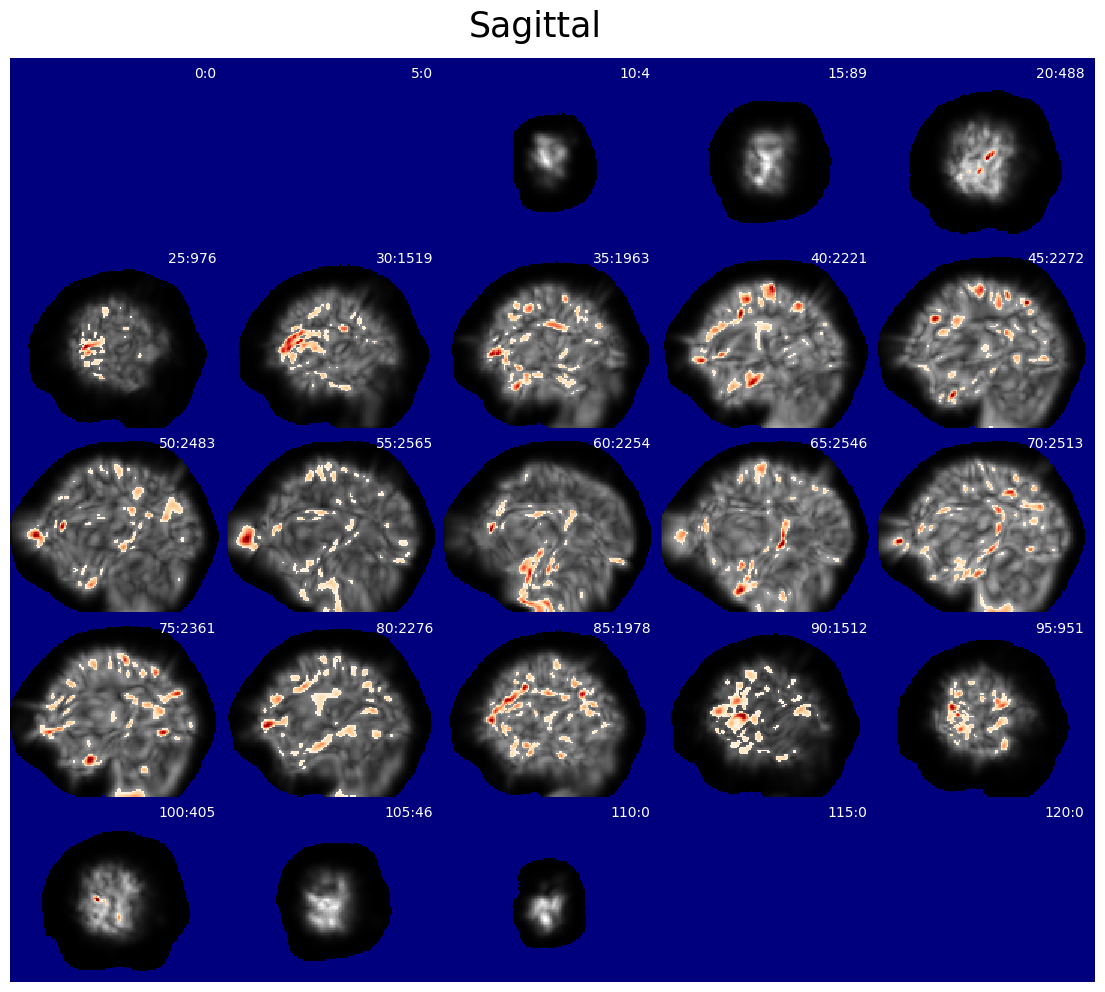

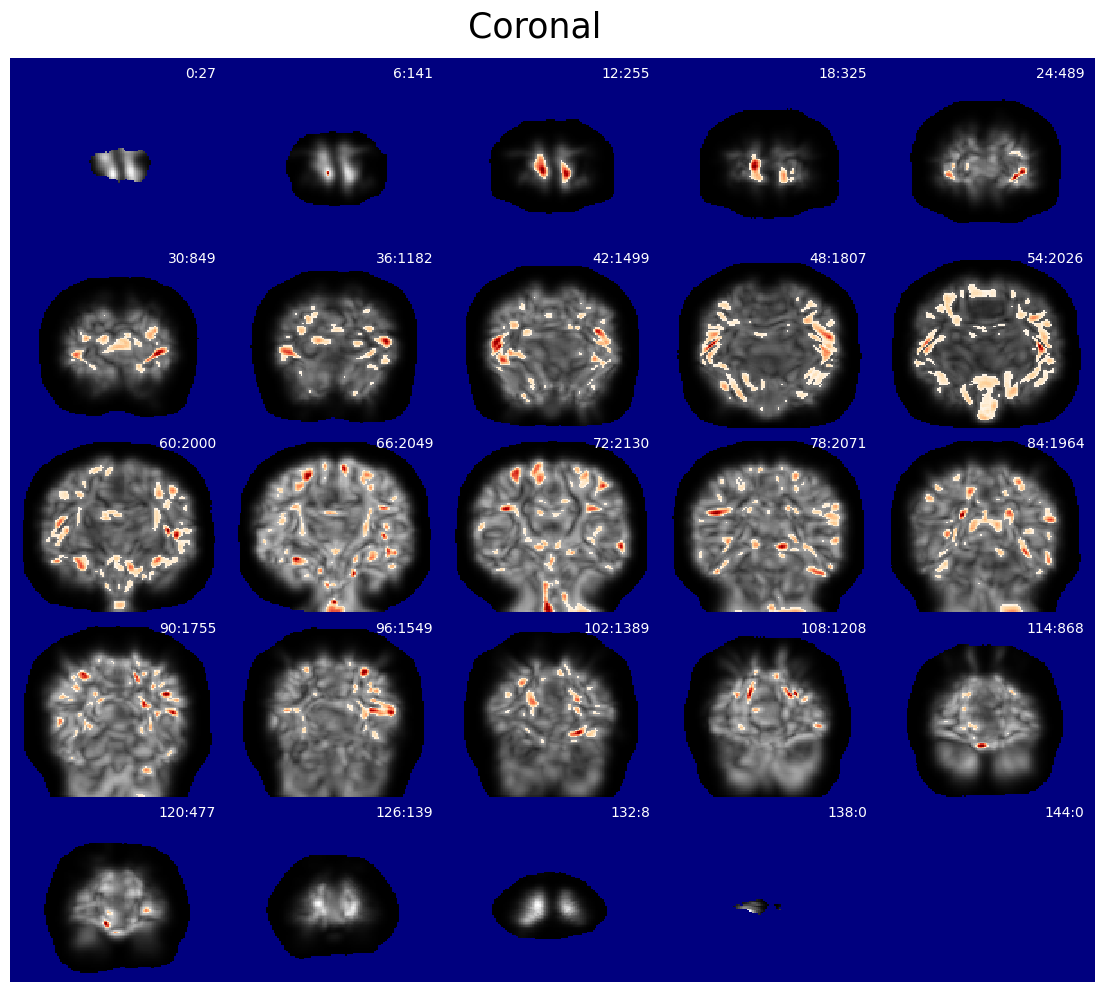

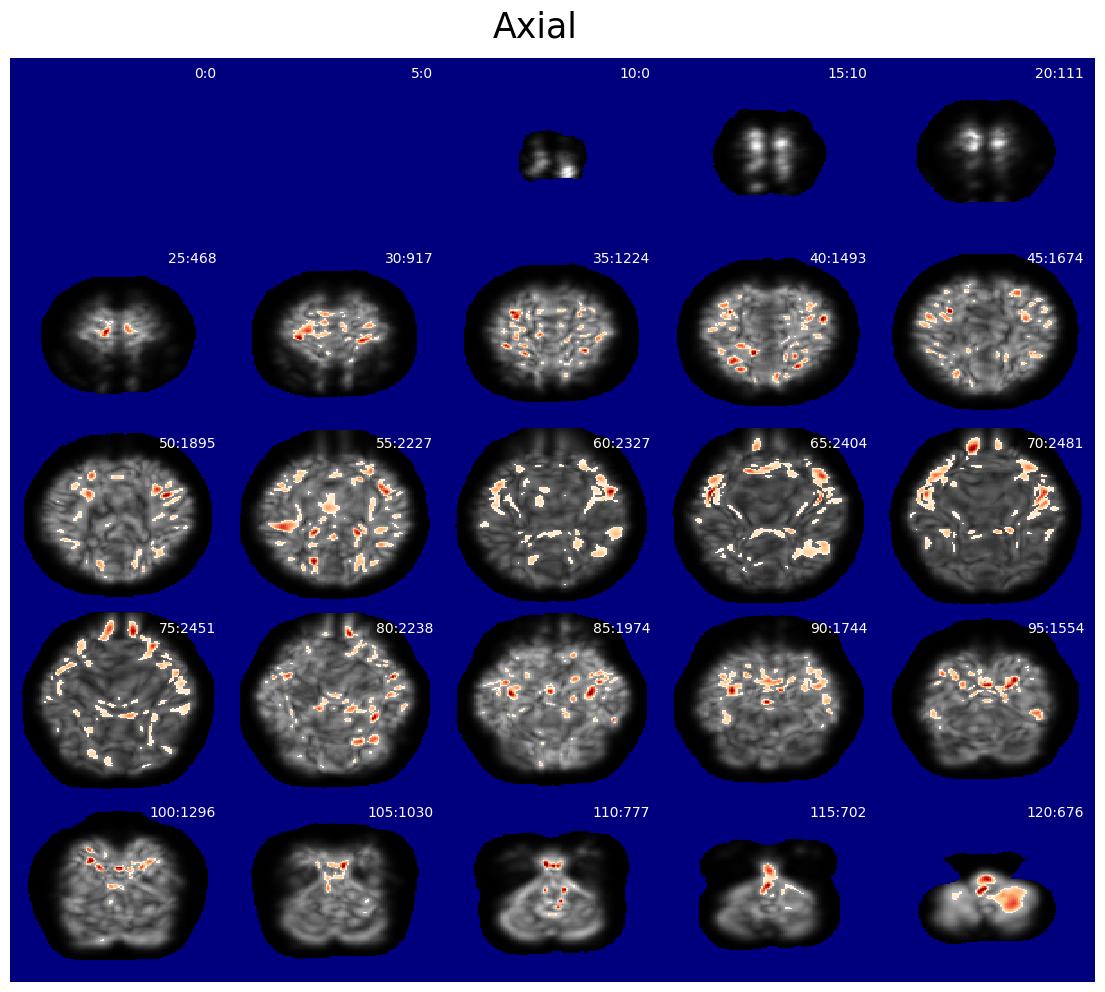

In [82]:
plot_lvs("coef_mat_wm.rds")

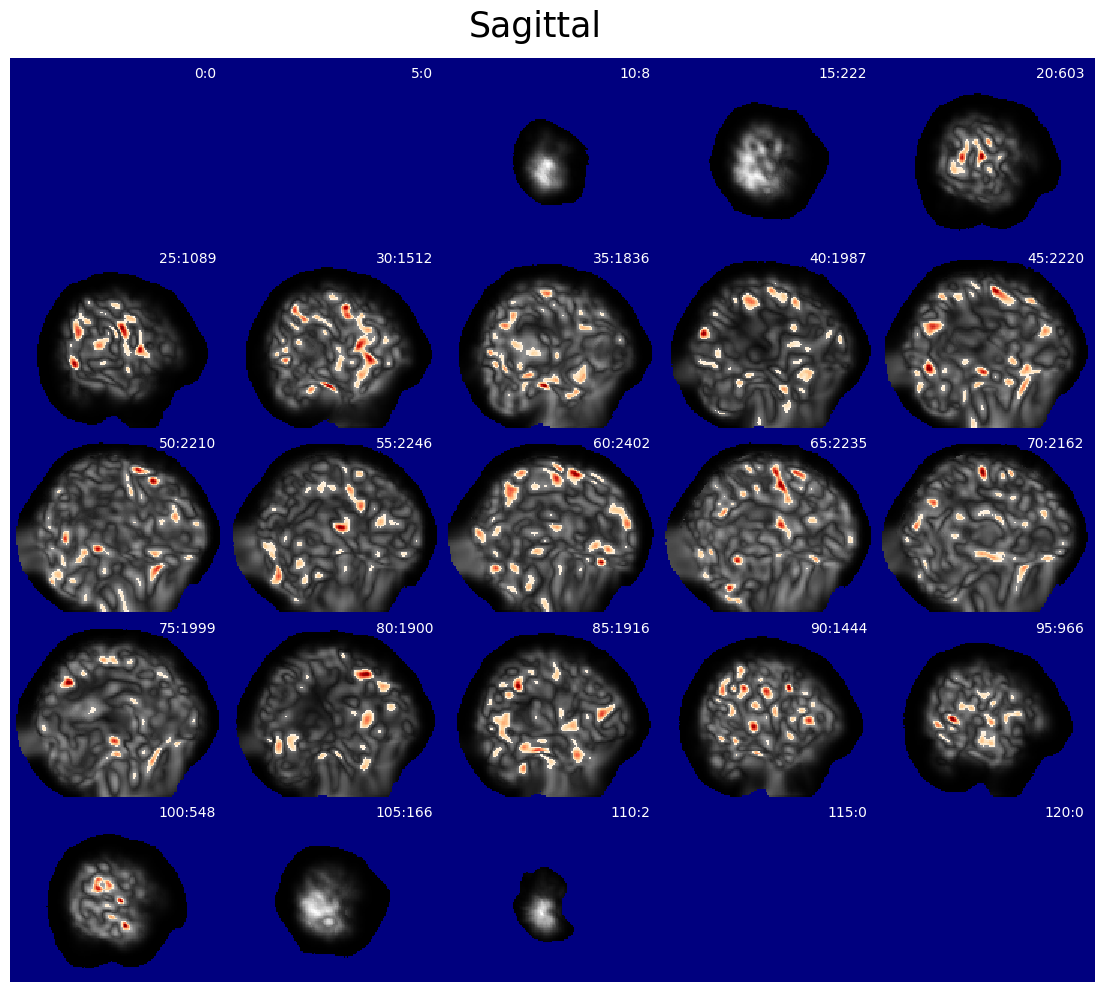

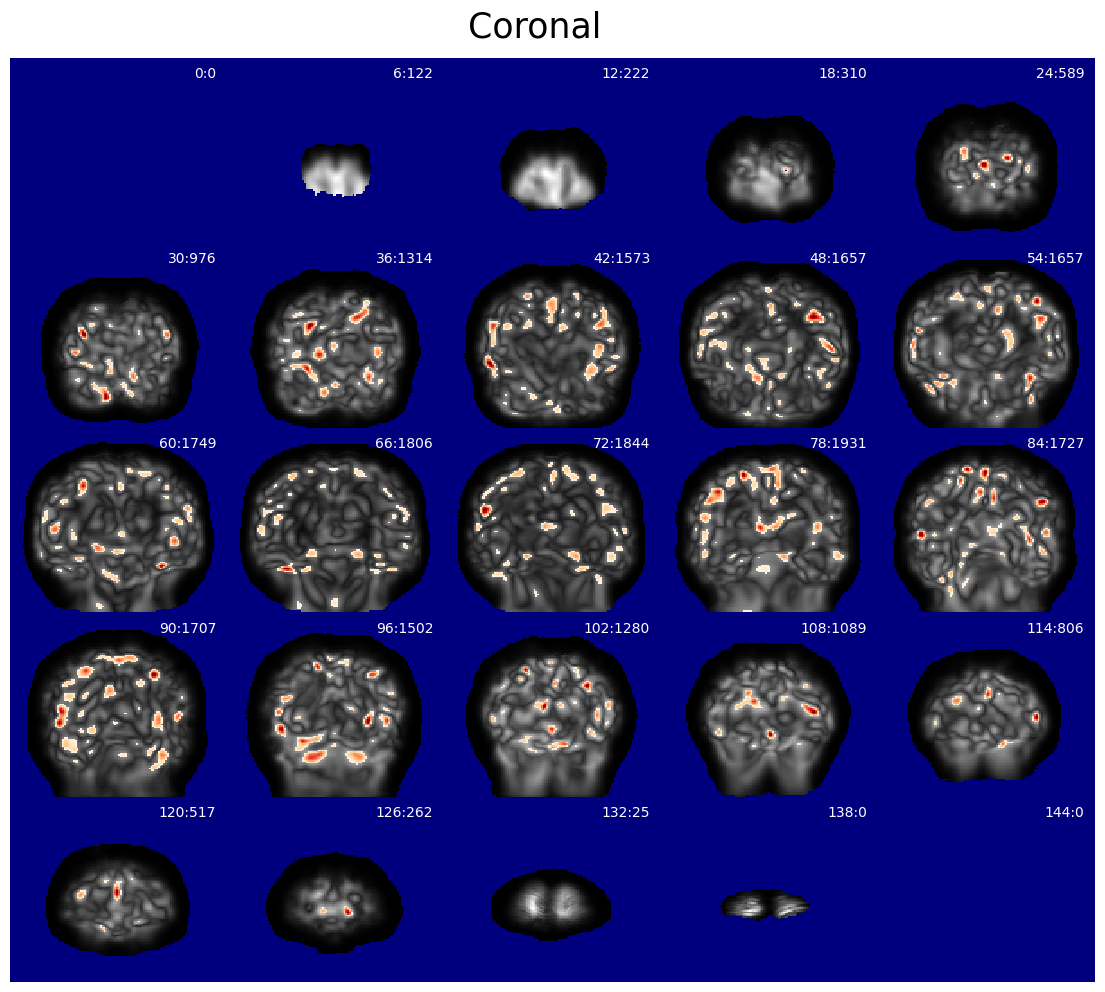

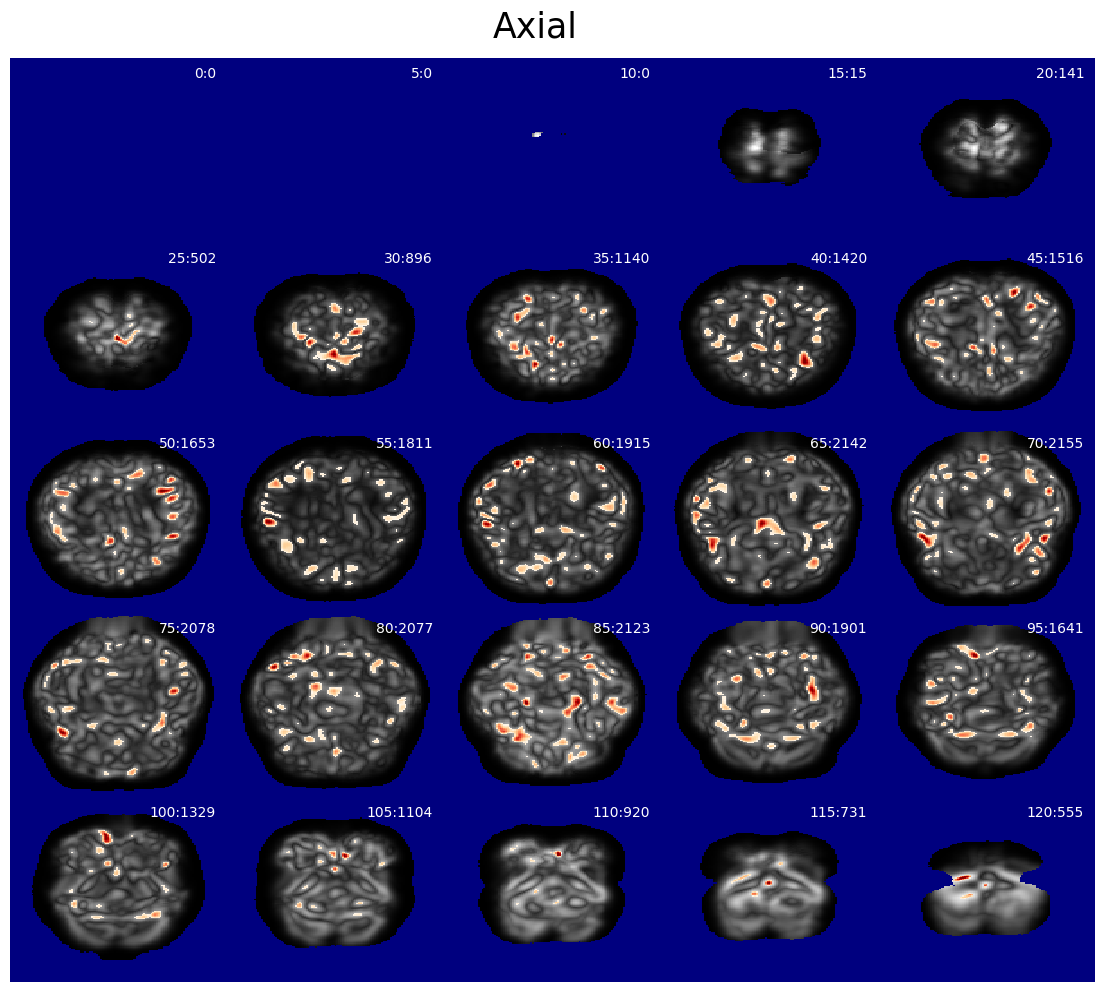

In [83]:
plot_lvs("coef_mat_gm.rds")

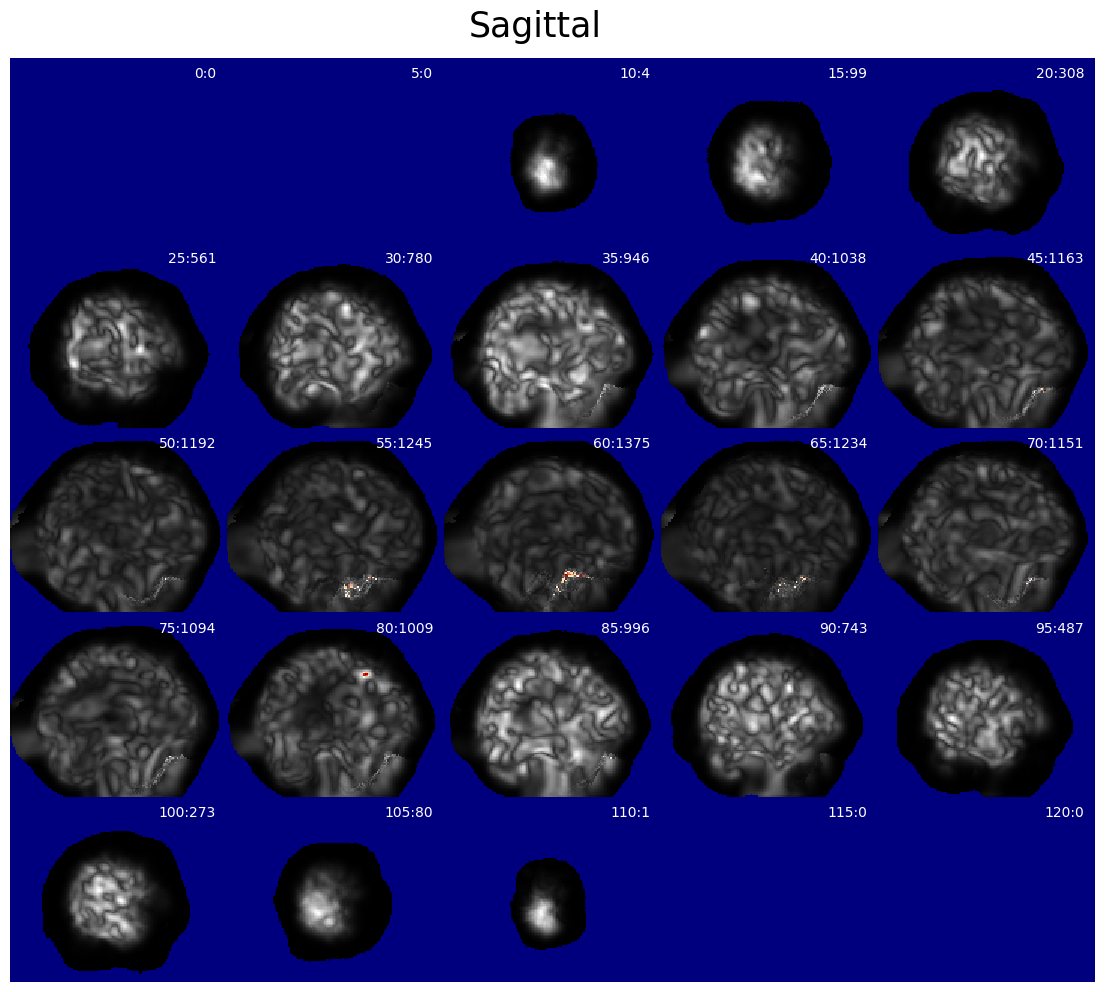

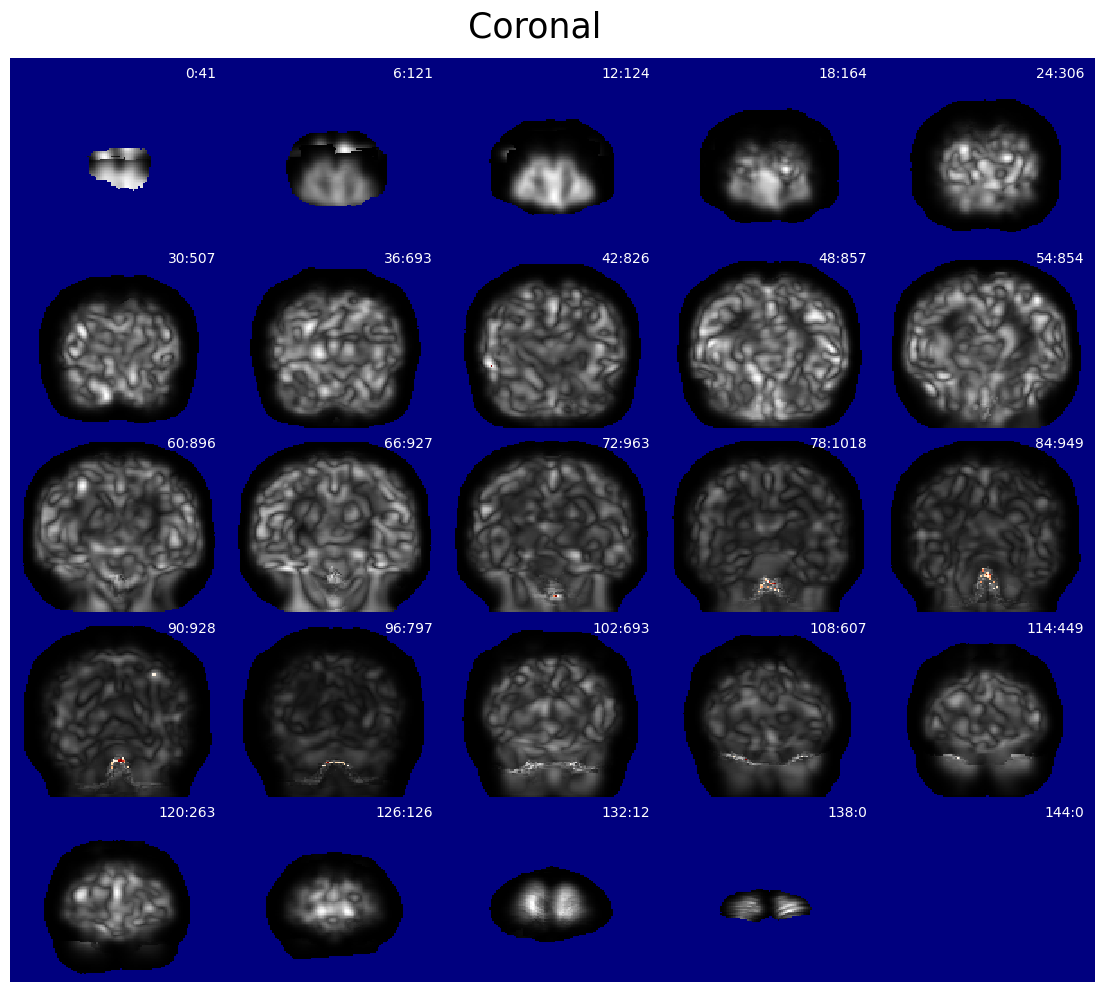

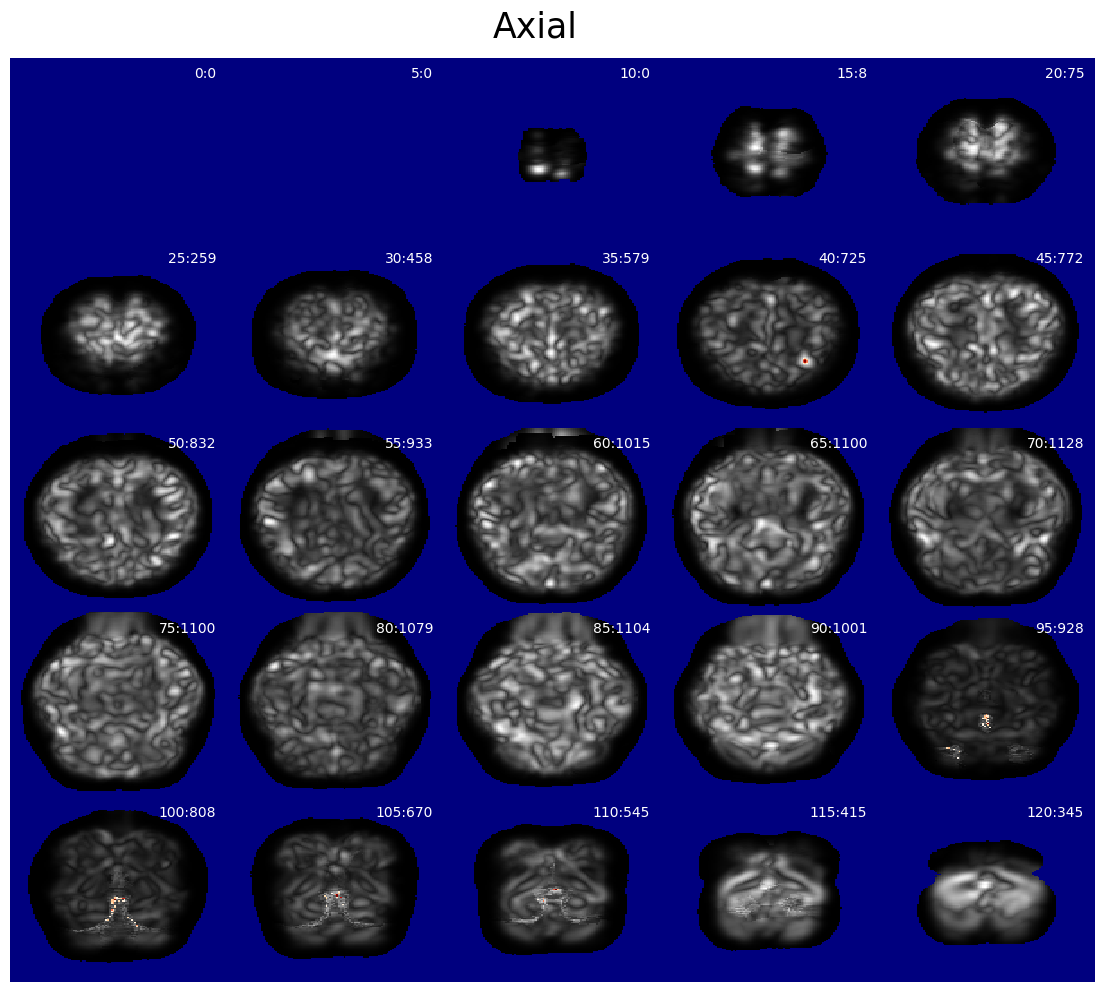

In [84]:
plot_lvs("coef_mat_cb.rds")